In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except ModuleNotFoundError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])
    import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/airbnbdataset.csv')
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,14087532,"Private room with 2 Windows, 1st FL",7056731869,unconfirmed,Masud,Brooklyn,Cypress Hills,40.68696,-73.87564,United States,...,$210,28.0,7.0,6/24/2019,0.29,3.0,4.0,312.0,NaN,NaN
23695,14088085,NYC Hotel (Enjoy top tier membership benefits),74784695196,unconfirmed,Sasha,Manhattan,Midtown,40.76347,-73.97800,United States,...,$11,1.0,3.0,7/29/2017,0.12,4.0,2.0,90.0,NaN,NaN
23696,14088637,Renovated Private Room in Ridgewood Coliving S...,10310185454,verified,Sergii,Queens,Ridgewood,40.70507,-73.90195,United States,...,$167,30.0,2.0,10/28/2018,0.10,1.0,6.0,365.0,NaN,NaN
23697,14089189,Newly Renovated 1 Bedroom in Hell's Kitchen. 5...,7517889326,unconfirmed,Matthew,Manhattan,Hell's Kitchen,40.76940,-73.98736,United States,...,$137,4.0,3.0,1/5/2018,0.13,2.0,1.0,0.0,NaN,NaN


In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


Checking the Missing Value

In [ ]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

id                                    0
NAME                                 76
host id                               0
host_identity_verified               95
host name                            40
neighbourhood group                  28
neighbourhood                        17
lat                                   9
long                                  9
country                              88
country code                         80
instant_bookable                     80
cancellation_policy                  51
room type                             1
Construction year                   147
price                                65
service fee                          63
minimum nights                      179
number of reviews                    29
last review                        3972
reviews per month                  3958
review rate number                  109
calculated host listings count       84
availability 365                    159
house_rules                        7835


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23699 non-null  int64  
 1   NAME                            23623 non-null  object 
 2   host id                         23699 non-null  int64  
 3   host_identity_verified          23604 non-null  object 
 4   host name                       23659 non-null  object 
 5   neighbourhood group             23671 non-null  object 
 6   neighbourhood                   23682 non-null  object 
 7   lat                             23690 non-null  float64
 8   long                            23690 non-null  float64
 9   country                         23611 non-null  object 
 10  country code                    23619 non-null  object 
 11  instant_bookable                23619 non-null  object 
 12  cancellation_policy             

#Handling

In [ ]:
df['last review']=pd.to_datetime(df['last review'],errors='coerce') # Converting to datetime format

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              23699 non-null  int64         
 1   NAME                            23623 non-null  object        
 2   host id                         23699 non-null  int64         
 3   host_identity_verified          23604 non-null  object        
 4   host name                       23659 non-null  object        
 5   neighbourhood group             23671 non-null  object        
 6   neighbourhood                   23682 non-null  object        
 7   lat                             23690 non-null  float64       
 8   long                            23690 non-null  float64       
 9   country                         23611 non-null  object        
 10  country code                    23619 non-null  object        
 11  in

In [ ]:
df.fillna({'reviews per month':0,
'last review':df['last review'].min()},inplace=True)

In [ ]:
df.dropna(subset=['NAME','host name'],inplace=True)

In [ ]:
print(df.isnull().sum())

id                                    0
NAME                                  0
host id                               0
host_identity_verified               85
host name                             0
neighbourhood group                  25
neighbourhood                        17
lat                                   9
long                                  9
country                              82
country code                         71
instant_bookable                     71
cancellation_policy                  45
room type                             1
Construction year                   134
price                                65
service fee                          63
minimum nights                      173
number of reviews                    28
last review                           0
reviews per month                     0
review rate number                   97
calculated host listings count       83
availability 365                    131
house_rules                        7802


In [ ]:
df=df.drop(columns=["license","house_rules"],errors='ignore')

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [ ]:
# remmove $ sign and convert it to float
df['price']=df['price'].replace('[\$,]','',regex=True).astype(float)
df['service fee']=df['service fee'].replace('[\$,]','',regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3944400298.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price']=df['price'].replace('[\$,]','',regex=True).astype(float)
/tmp/ipython-input-3944400298.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee']=df['service fee'].replace('[\$,]','',regex=True).astype(float)


In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [ ]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23589 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              23589 non-null  int64         
 1   NAME                            23589 non-null  object        
 2   host id                         23589 non-null  int64         
 3   host_identity_verified          23504 non-null  object        
 4   host name                       23589 non-null  object        
 5   neighbourhood group             23564 non-null  object        
 6   neighbourhood                   23572 non-null  object        
 7   lat                             23580 non-null  float64       
 8   long                            23580 non-null  float64       
 9   country                         23507 non-null  object        
 10  country code                    23518 non-null  object        
 11  instant

In [ ]:
#statistical summary
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,2.358900e+04,2.358900e+04,23580.000000,23580.000000,23455.000000,23524.000000,23526.000000,23416.000000,23561.000000,23589,23589.000000,23492.000000,23506.000000,23458.000000
mean,7.564494e+06,4.927716e+10,40.729474,-73.956323,2012.477169,619.357635,123.819434,7.689358,35.000552,2017-05-10 18:54:46.379244544,0.805219,2.998255,3.701395,176.461207
min,1.001254e+06,1.303496e+08,40.499790,-74.242850,2003.000000,50.000000,10.000000,-12.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,4.299119e+06,2.460637e+10,40.689680,-73.983033,2007.000000,329.000000,66.000000,2.000000,1.000000,2016-01-17 00:00:00,0.040000,2.000000,1.000000,47.000000
50%,7.562660e+06,4.914264e+10,40.723200,-73.957650,2012.000000,615.000000,123.000000,3.000000,9.000000,2018-07-18 00:00:00,0.230000,3.000000,1.000000,169.000000
75%,1.083172e+07,7.395613e+10,40.764070,-73.941150,2017.000000,909.000000,182.000000,5.000000,44.000000,2019-06-10 00:00:00,1.040000,4.000000,2.000000,297.000000
max,1.408974e+07,9.876097e+10,40.911690,-73.712990,2022.000000,1200.000000,240.000000,3455.000000,629.000000,2058-06-16 00:00:00,16.220000,5.000000,121.000000,426.000000
std,3.769808e+06,2.846564e+10,0.053514,0.039936,5.778838,333.379558,66.649189,32.909790,57.493364,NaN,1.261723,1.419036,12.789912,135.580850


Visulalization

Distribuion of listing prices

<function matplotlib.pyplot.show(close=None, block=None)>

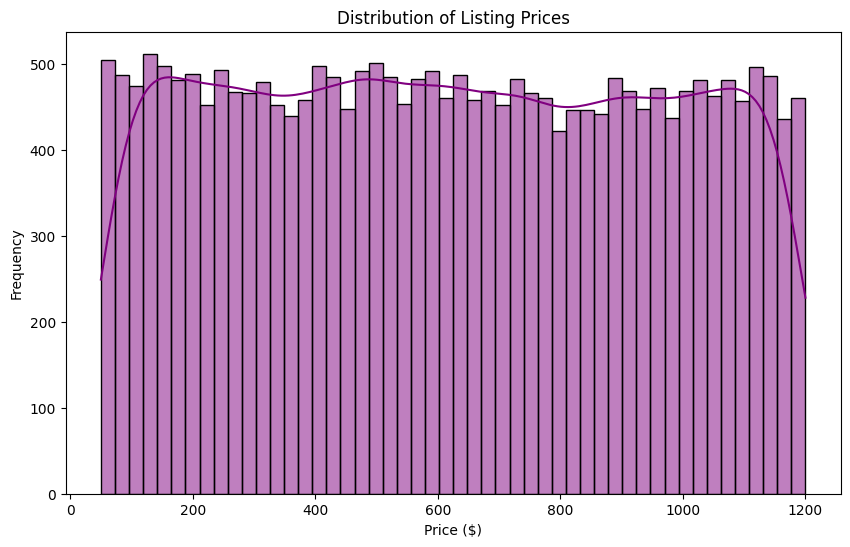

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=50,kde=True, color='purple')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show

The plot shows a fairly even distribution of listing prices across different price ranges , indicating no particular concentration of listing in any specific price range. The KDE line helps visualize this even spread more clearly, confirming that the dataset contains listing with a wide variety of prices.

Room Type Distribution

In [ ]:
df['room type']

,room type
0,Private room
1,Entire home/apt
2,Private room
4,Entire home/apt
5,Entire home/apt
...,...
23694,Private room
23695,Entire home/apt
23696,Shared room
23697,Entire home/apt


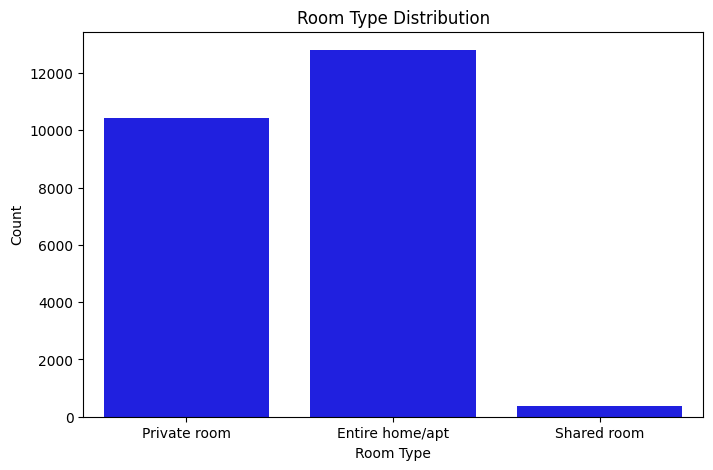

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='room type',data=df, color='blue')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

The count plot shows a clear distribution of the different room types available in the Airbnb dataset.

The majority of listings are for
'Entire home/apt' and 'Private room', with 'Shared room' and 'Hotel room' being much less common. This insight can be useful for understanding the availability and popularity of different types of accommodations on Airbnb.

Neighbourhood Analysis

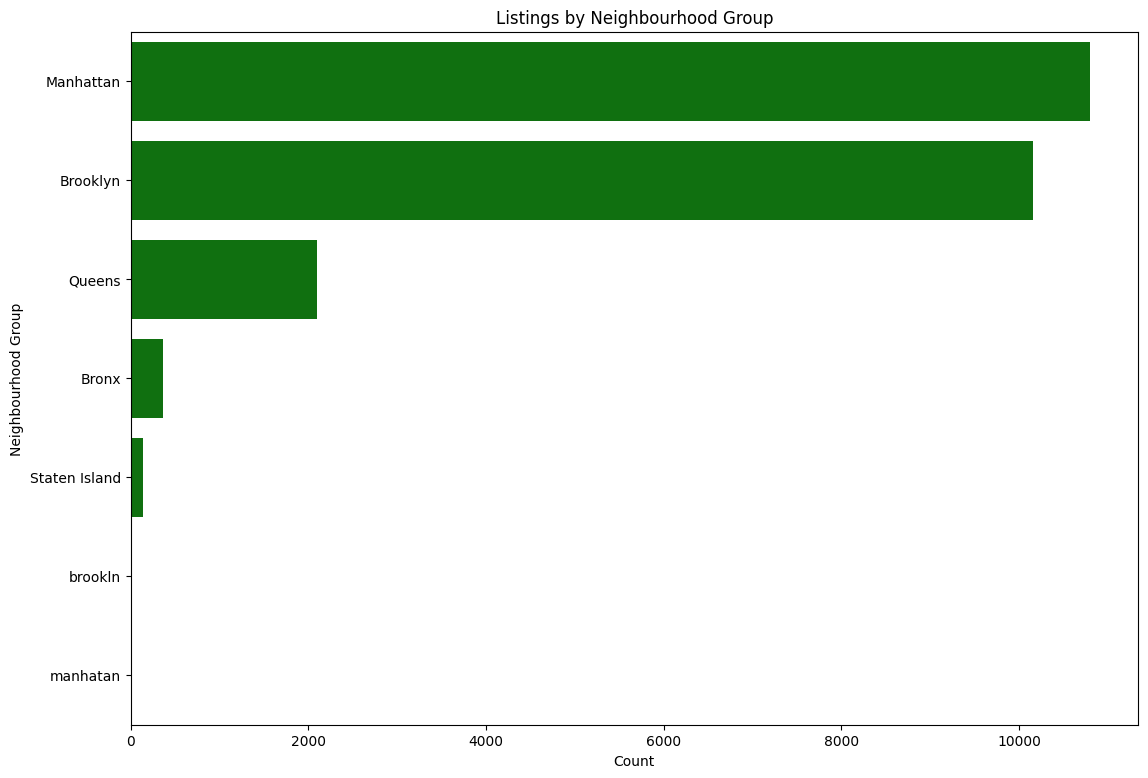

In [ ]:
plt.figure(figsize=(13,9))
sns.countplot(y='neighbourhood group',data=df,color='green',order=df['neighbourhood group'].value_counts().index )
plt.title('Listings by Neighbourhood Group')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')
plt.show()

The count plot shows a clear distribution of the number of listings across different neighborhood groups. Manhattan and Brooklyn dominate the listings, suggesting they are prime locations for Airbnb. Queens, Bronx, and Staten Island have fewer listings, indicating less availability or popularity.

Price VS Room Type

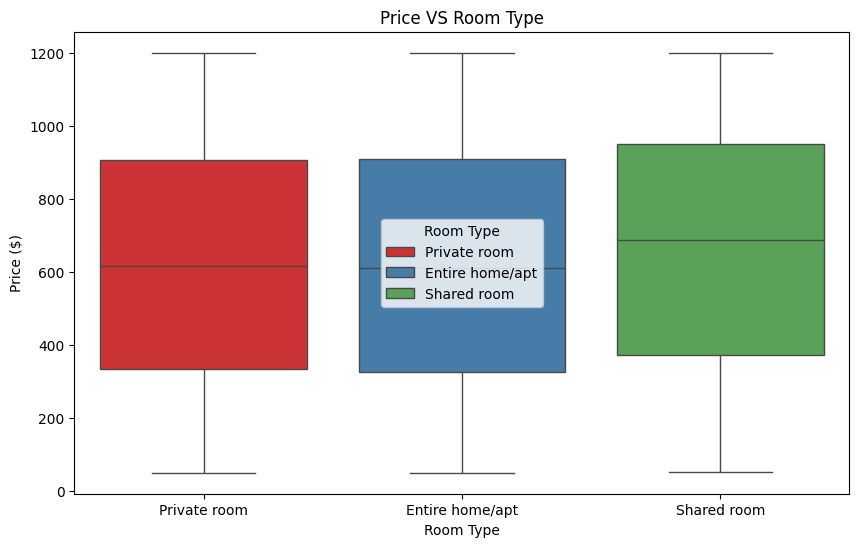

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room type',y='price', hue='room type' ,data=df, palette='Set1')
plt.title('Price VS Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.legend(title='Room Type')
plt.show()

Price vs. Room Type The box plot provides a detailed view of how prices vary across different room types in the Airbnb dataset. It shows that while 'Shared room' tends to have lower prices, 'Private room', Entire home/apt', and 'Hotel room' have higher and more varied price ranges, This visualization helps in understanding the pricing dynamics for different types of accommodations on Airbnb.

Reviews over Time

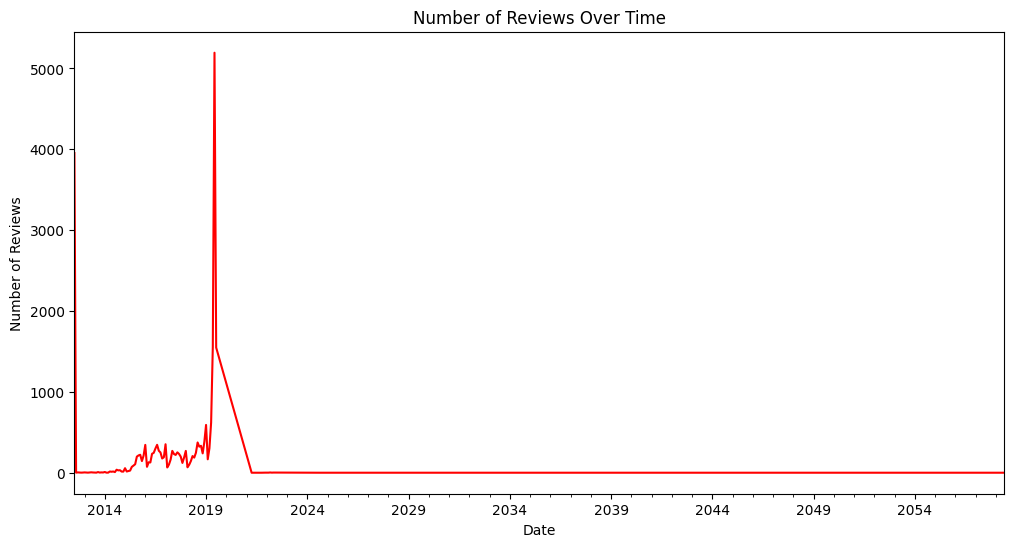

In [ ]:
df['last review']=pd.to_datetime(df['last review'])
reviews_over_time=df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(12,6))
reviews_over_time.plot(kind='line', color='red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

The line plot provides a clear visualization of the number of reviews over time.

It helps identify trends and patterns in review activity, such as periods of high or low activity. This information can be useful for understanding the dynamics of user engagement and the popularity of Airbnb listings over time. The significant spikes and drops in reviews might be worth further investigation to understand the underlying causes, such as changes in Airbnb policies, market conditions, or external events.